# Sparse regression with `EdmdMeta`

This example demonstrates how sparse regression can be leveraged to eliminate unneeded lifting functions.

In [1]:
# Imports
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso

import pykoop

# Set plot defaults
plt.rc('lines', linewidth=2)
plt.rc('axes', grid=True)
plt.rc('grid', linestyle='--')

Load example data from the library. `eg` is a `dict` containing training data, validation data, and a few related parameters.

In [2]:
eg = pykoop.example_data_msd()

Create two different pipelines with the same lifting functions. `pykoop.Edmd` uses Tikhonov (ridge) regression, which does not promote sparsity. `pykoop.EdmdMeta` can be set up to use any `scikit-learn` regressor. In this case, it uses the lasso, which promotes sparsity.

In [3]:
# Choose lifting functions
poly3 = [('pl', pykoop.PolynomialLiftingFn(order=3))]

# Create dense pipeline
kp_dense = pykoop.KoopmanPipeline(
    lifting_functions=poly3,
    regressor=pykoop.Edmd(alpha=1e-9),
)

# Create sparse pipeline
kp_sparse = pykoop.KoopmanPipeline(
    lifting_functions=poly3,
    regressor=pykoop.EdmdMeta(regressor=Lasso(alpha=1e-9)),
)

Fit both pipelines

In [4]:
kp_dense.fit(
    eg['X_train'],
    n_inputs=eg['n_inputs'],
    episode_feature=eg['episode_feature'],
)

kp_sparse.fit(
    eg['X_train'],
    n_inputs=eg['n_inputs'],
    episode_feature=eg['episode_feature'],
)

KoopmanPipeline(lifting_functions=[('pl', PolynomialLiftingFn(order=3))],
                regressor=EdmdMeta(regressor=Lasso(alpha=1e-09)))

Plot the prediction of the dense Koopman pipeline, along with its Koopman matrix. Notice that no columns are all zero, so no lifting functions can be removed.

Text(0.5, 1.0, 'Dense regression')

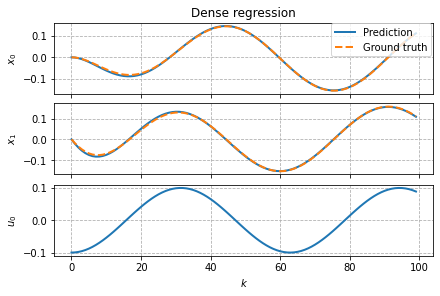

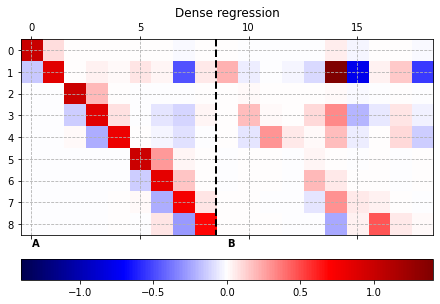

In [5]:
# Plot dense prediction
fig, ax = kp_dense.plot_predicted_trajectory(
    eg['X_valid'],
    plot_input=True,
)
ax[0, 0].set_title('Dense regression')

# Plot dense Koopman matrix
fig, ax = kp_dense.plot_koopman_matrix()
ax.set_title('Dense regression')

Plot the prediction of the sparse Koopman pipeline, along with its Koopman matrix. The prediciton is somewhat worse, but notice that there are several columns of all zeros, which means those lifting functions can be eliminated without affecting the prediction.

Text(0.5, 1.0, 'Sparse regression')

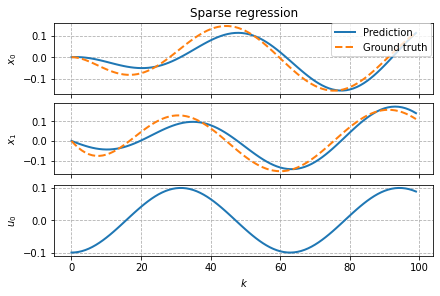

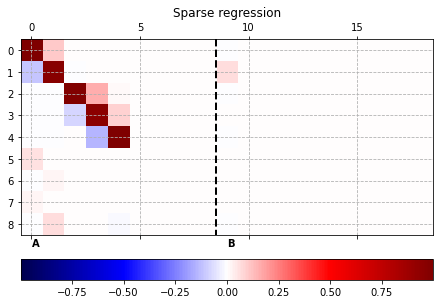

In [6]:
# Plot sparse prediction
fig, ax = kp_sparse.plot_predicted_trajectory(
    eg['X_valid'],
    plot_input=True,
)
ax[0, 0].set_title('Sparse regression')

# Plot sparse Koopman matrix
fig, ax = kp_sparse.plot_koopman_matrix()
ax.set_title('Sparse regression')